AL - Assaf Pratama. R

# library

In [1]:
import pandas as pd
import numpy as np

# Load the DataSet

In [2]:
df=pd.read_csv('sampled_twitter_data.csv')
df.head()

,TweetID,entity,sentiment,Tweet content
0,5834,HomeDepot,Irrelevant,You'd think his retinas would have burnt out b...
1,4098,CS-GO,Irrelevant,Feel like pure shit just want an English team ...
2,6559,Fortnite,Irrelevant,Honestly... that mentality is disgusting and a...
3,7575,LeagueOfLegends,Irrelevant,@G2esports: brings together a european league ...
4,424,ApexLegends,Irrelevant,Who the hell is at level 500?!?!?????????!?!?!...


In [3]:
df.columns=['TweetID','entity','sentiment','Tweet content']
df.head()

,TweetID,entity,sentiment,Tweet content
0,5834,HomeDepot,Irrelevant,You'd think his retinas would have burnt out b...
1,4098,CS-GO,Irrelevant,Feel like pure shit just want an English team ...
2,6559,Fortnite,Irrelevant,Honestly... that mentality is disgusting and a...
3,7575,LeagueOfLegends,Irrelevant,@G2esports: brings together a european league ...
4,424,ApexLegends,Irrelevant,Who the hell is at level 500?!?!?????????!?!?!...


# Basic EDA

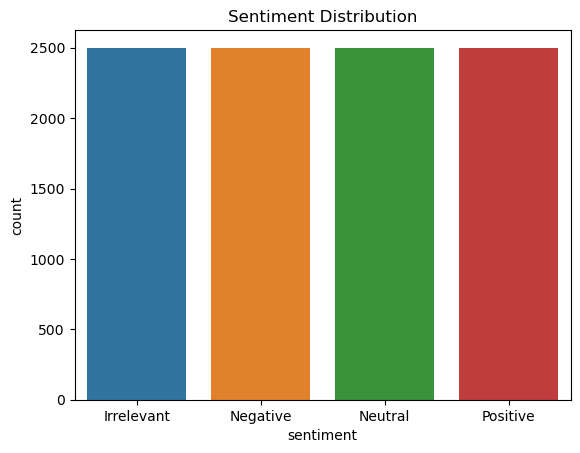

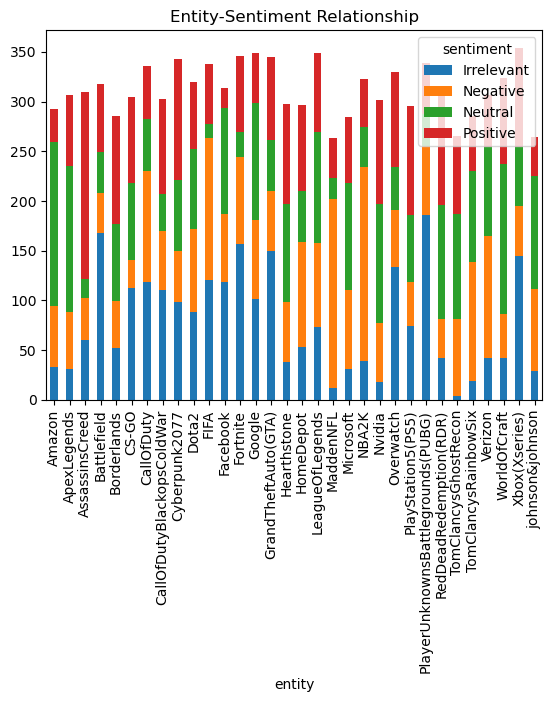

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Entity and sentiment relationship
entity_sentiment_counts = df.groupby(['entity', 'sentiment']).size().unstack()
entity_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Entity-Sentiment Relationship')
plt.show()


# Wordcloud for different Sentiment

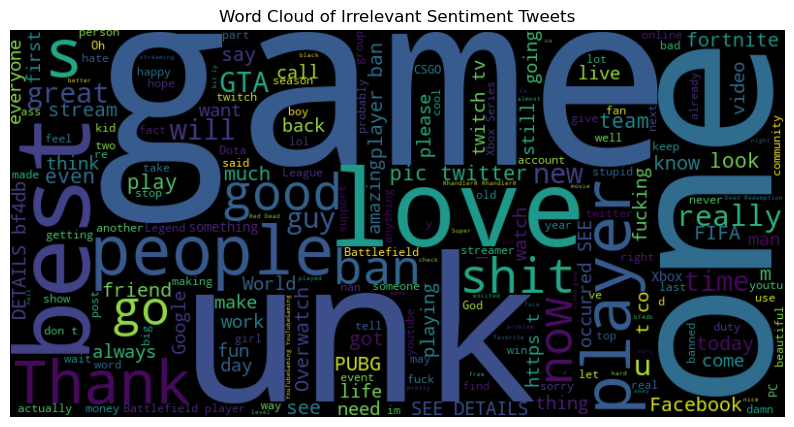

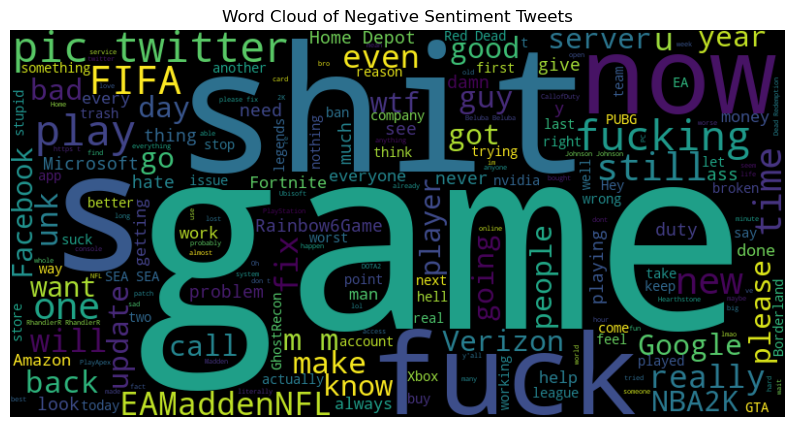

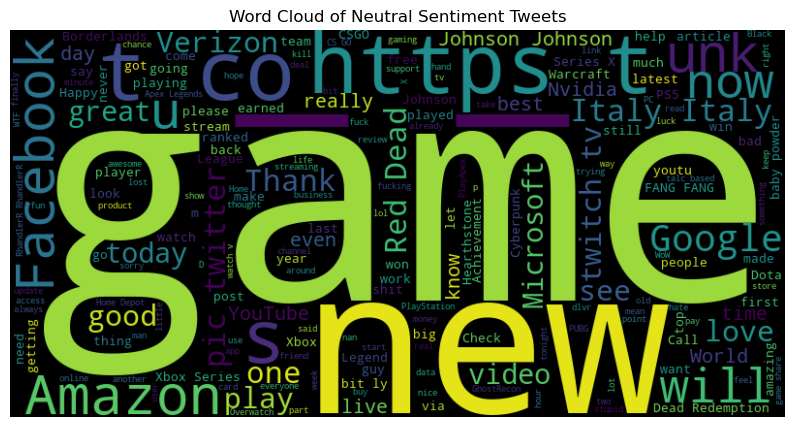

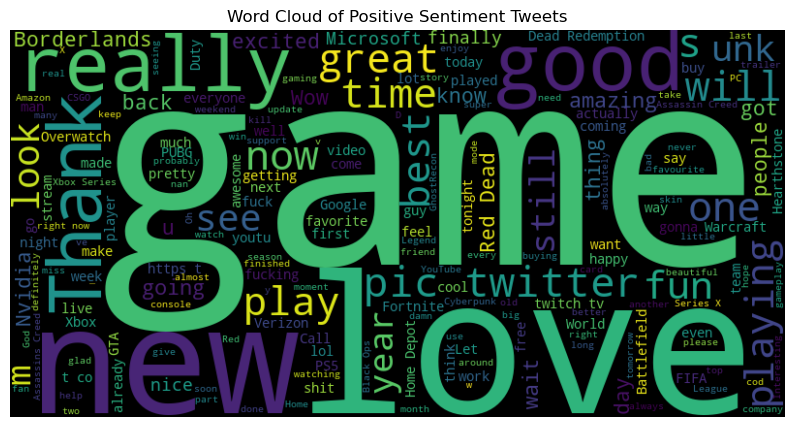

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(sentiment):
    # Filter tweets of the specified sentiment and extract the 'Tweet content' column
    tweets = df[df["sentiment"] == sentiment]["Tweet content"]
    
    # Convert the tweets to strings
    tweets = tweets.astype(str)
    
    # Join all the tweets into a single string
    text = ' '.join(tweets)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {sentiment} Sentiment Tweets')
    plt.show()

# Iterate over the unique sentiments in the DataFrame
sentiments = df['sentiment'].unique()
for sentiment in sentiments:
    generate_wordcloud(sentiment)


# Wordcloud for different Entities

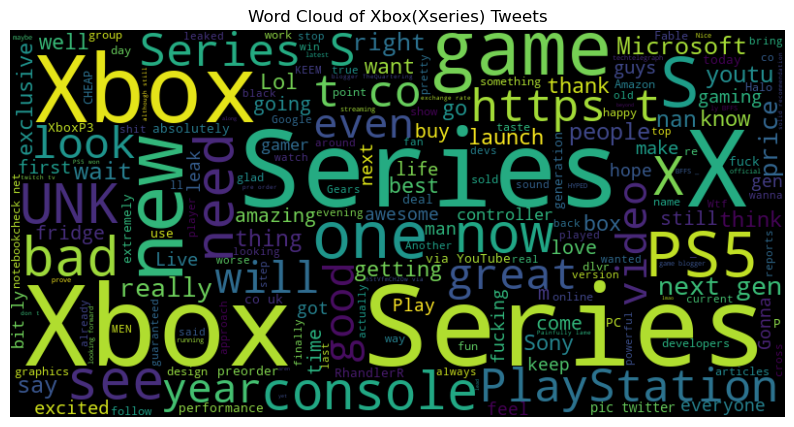

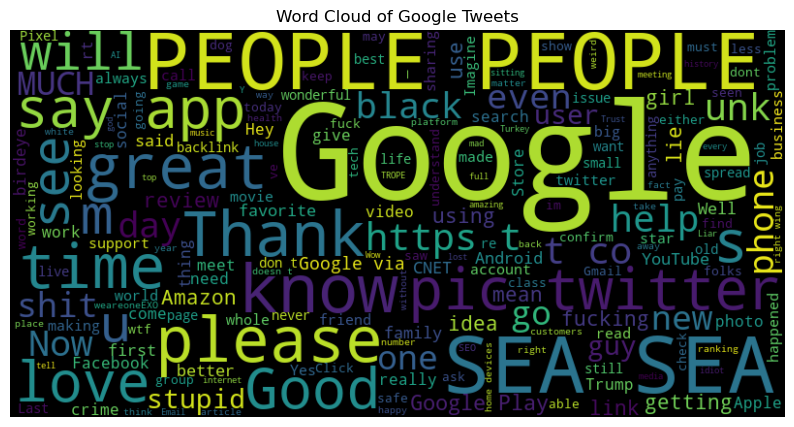

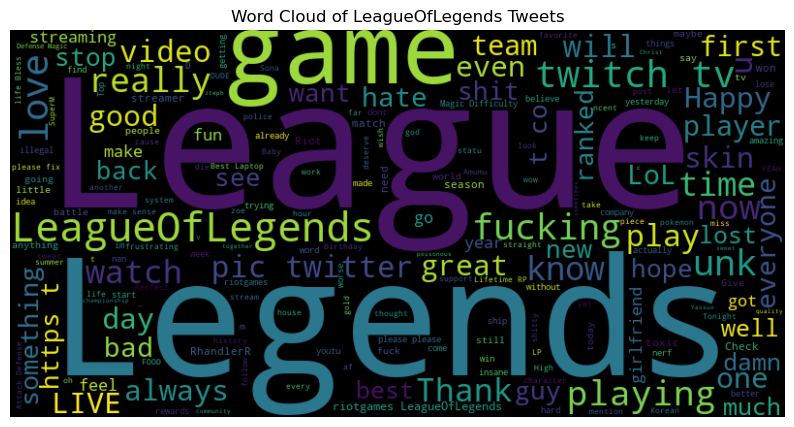

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calculate the counts of each entity
entity_counts = df['entity'].value_counts()

# Select the top three entities with the highest counts
top_entities = entity_counts.head(3).index.tolist()

# Iterate over the top entities and generate word clouds
for entity in top_entities:
    # Filter tweets associated with the current entity and extract the 'Tweet content' column
    tweets = df[df['entity'] == entity]['Tweet content']
    
    # Convert the tweets to strings
    tweets = tweets.astype(str)
    
    # Join all the tweets into a single string
    text = ' '.join(tweets)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {entity} Tweets')
    plt.show()


# Data preprocessing & Tokenization

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Apply preprocessing to the 'Tweet content' column
df['Tweet content']=df['Tweet content'].astype('str')
df['clean_text'] = df['Tweet content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Model training & evaluation

In [8]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split dataset sampel menjadi data latih dan data uji
X = df['clean_text']
y = df['sentiment']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Selanjutnya, Anda dapat melanjutkan dengan vektorisasi dan pelatihan model seperti yang telah dijelaskan sebelumnya.
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC # Add this import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


Evaluation for Decision Tree:
Confusion Matrix:
[[235  58 114 105]
 [ 63 269 103  65]
 [ 64  64 301  63]
 [ 69  71 113 243]]
Accuracy: 52.4 percent
Precision: 0.53
Recall: 0.52
F1 Score: 0.52


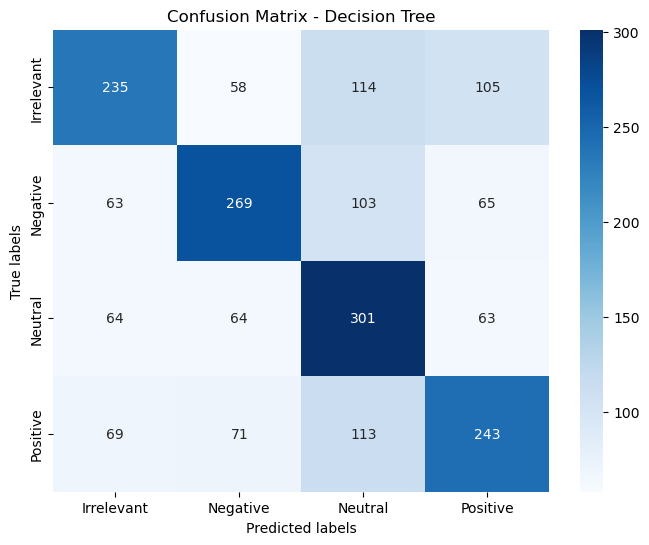

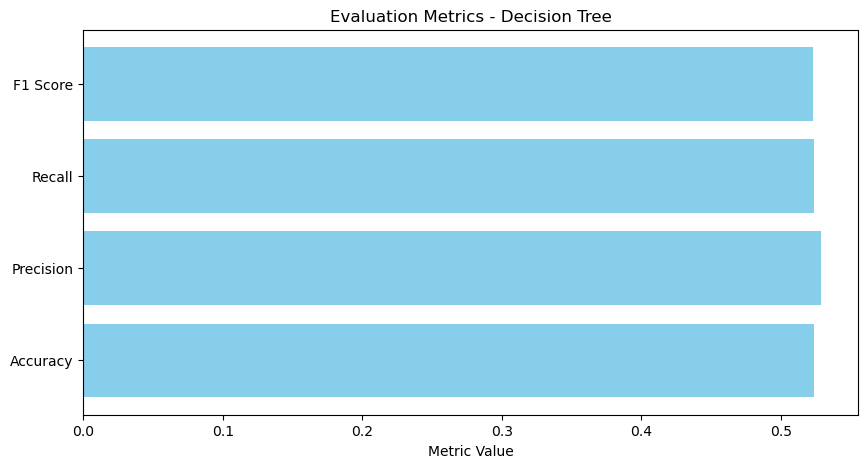


Evaluation for Random Forest:
Confusion Matrix:
[[283  48 100  81]
 [ 35 318  88  59]
 [ 41  54 336  61]
 [ 38  65  82 311]]
Accuracy: 62.4 percent
Precision: 0.63
Recall: 0.62
F1 Score: 0.62


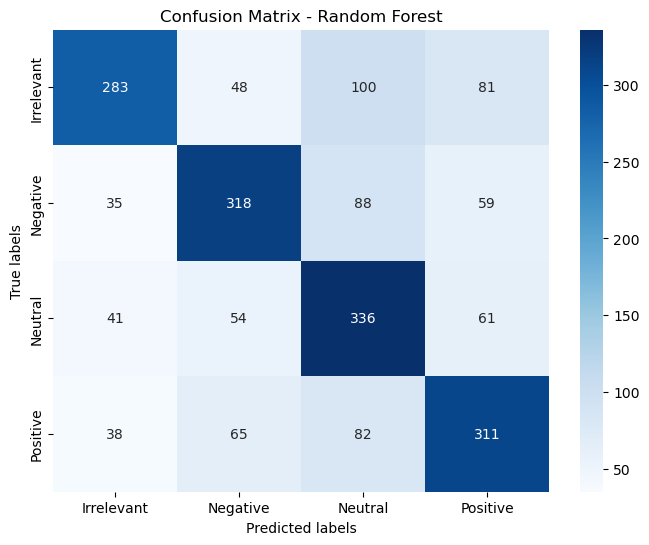

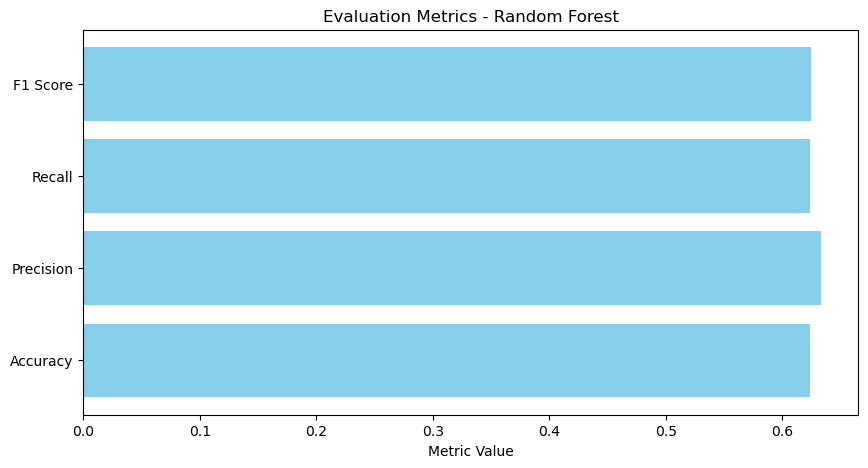

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Evaluation for Logistic Regression:
Confusion Matrix:
[[304  55  79  74]
 [ 54 335  65  46]
 [ 78  61 296  57]
 [ 76  63  63 294]]
Accuracy: 61.45 percent
Precision: 0.61
Recall: 0.61
F1 Score: 0.61


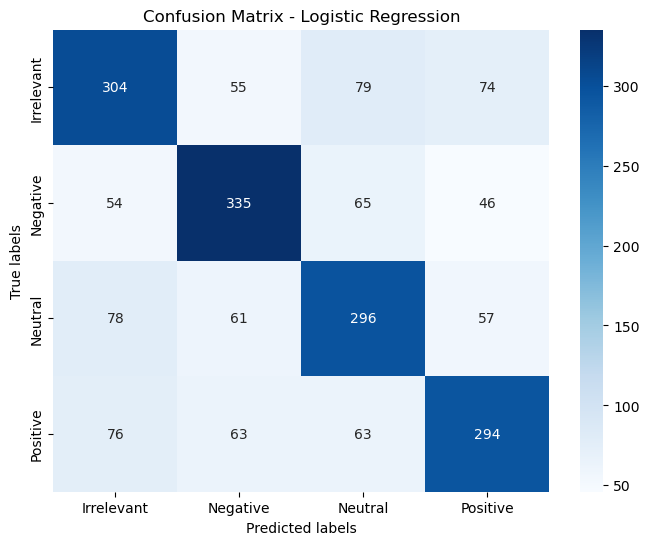

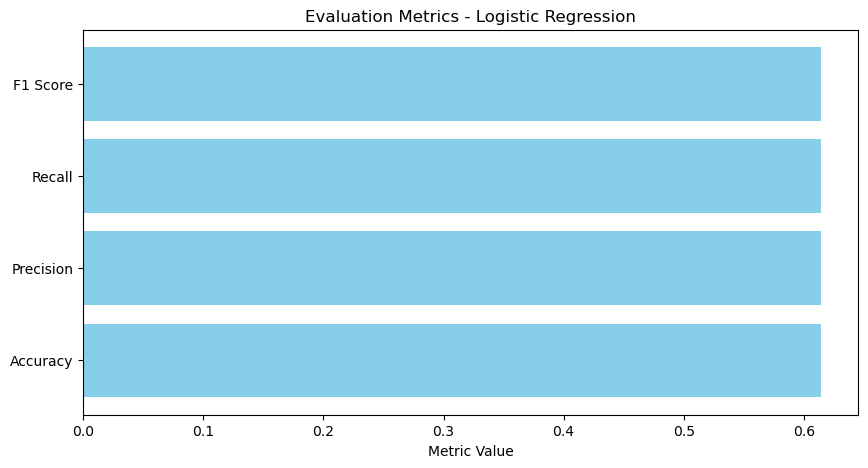


Evaluation for Linear SVC:
Confusion Matrix:
[[330  44  69  69]
 [ 63 338  53  46]
 [ 72  56 305  59]
 [ 80  61  59 296]]
Accuracy: 63.45 percent
Precision: 0.63
Recall: 0.63
F1 Score: 0.63


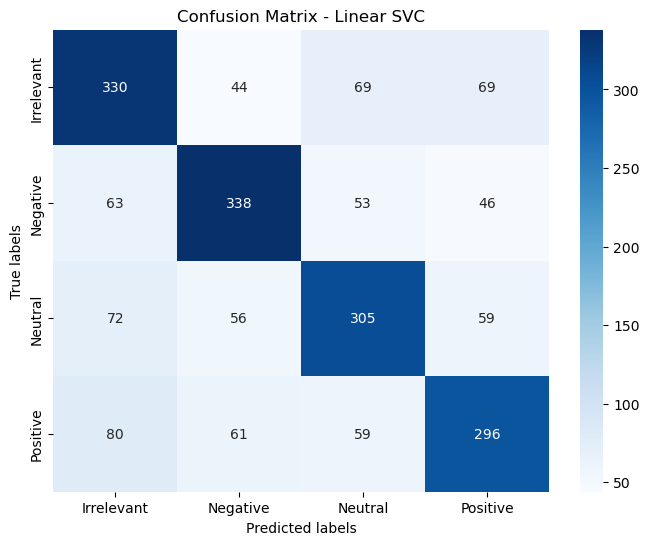

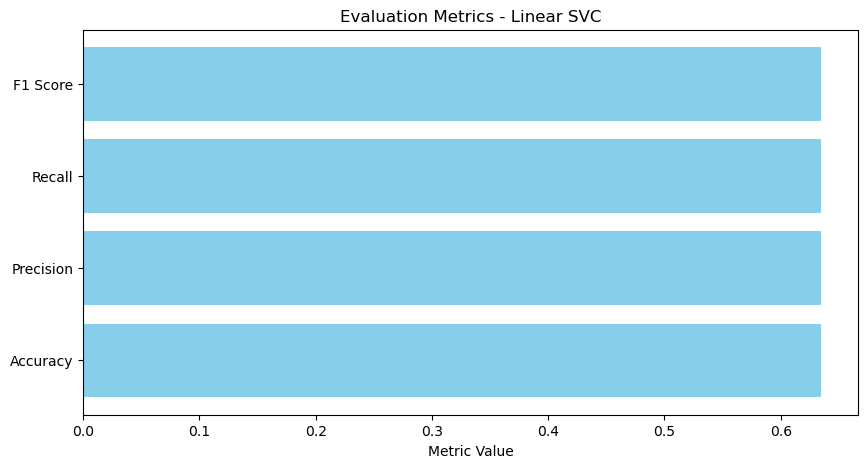


Evaluation for SVM:
Confusion Matrix:
[[335  44  70  63]
 [ 42 346  68  44]
 [ 57  52 333  50]
 [ 50  60  77 309]]
Accuracy: 66.15 percent
Precision: 0.66
Recall: 0.66
F1 Score: 0.66


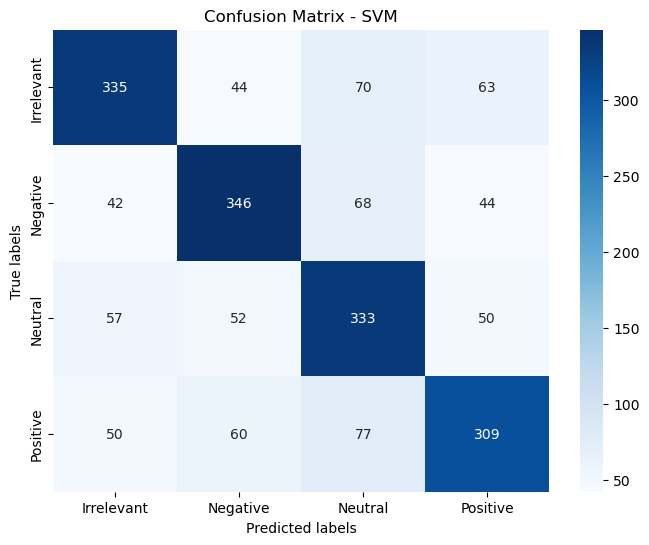

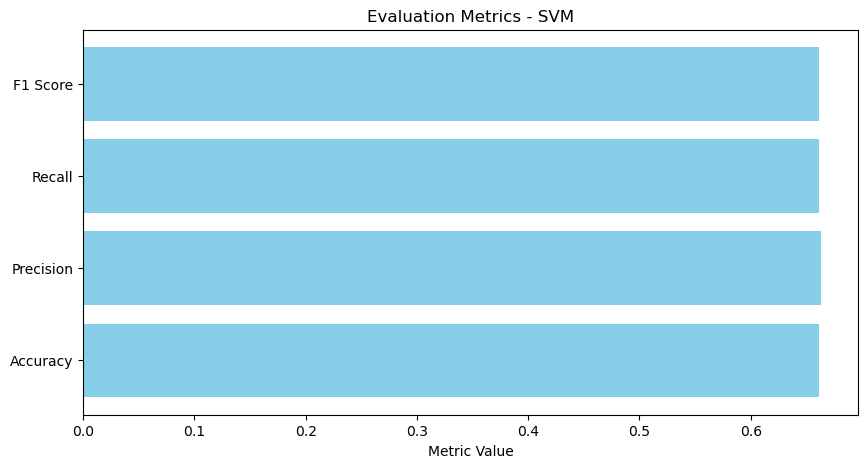


Evaluation for KNN:
Confusion Matrix:
[[ 90  86   0 336]
 [ 12 110   2 376]
 [ 15 108  64 305]
 [ 19  15   3 459]]
Accuracy: 36.15 percent
Precision: 0.56
Recall: 0.36
F1 Score: 0.31


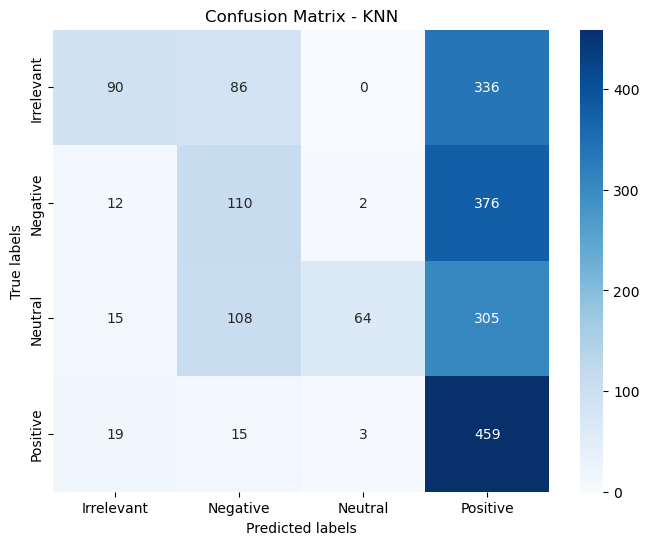

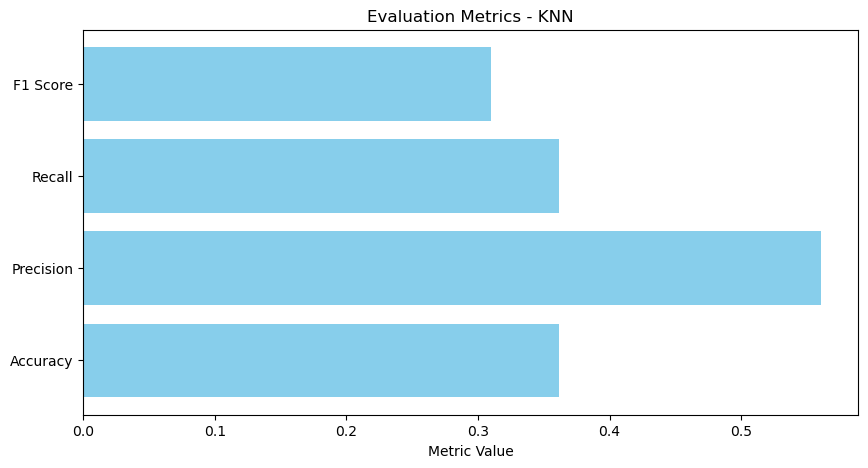

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Function to evaluate and plot results
def evaluate_and_plot_model(model, X_train_vec, y_train, X_val_vec, y_val, model_name):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_val_vec)

    # Calculate metrics
    cm = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    # Print metrics
    print(f"\nEvaluation for {model_name}:")
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", round(accuracy * 100, 2), "percent")
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1 Score:", round(f1, 2))

    # Get unique sentiment labels from the 'sentiment' column
    sentiment_labels = df['sentiment'].unique()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Plot horizontal bar chart for evaluation metrics
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    metrics_values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(10, 5))
    plt.barh(metrics_names, metrics_values, color='skyblue')
    plt.xlabel('Metric Value')
    plt.title(f'Evaluation Metrics - {model_name}')
    plt.show()

# Models
models = {
    'Decision Tree': DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Linear SVC': SVC(kernel = 'linear', random_state = 0),
    'SVM' : SVC(kernel = 'rbf', random_state = 0),
    'KNN': KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    # Add more models if needed
}

# Loop through models
for model_name, model in models.items():
    evaluate_and_plot_model(model, X_train_vec, y_train, X_val_vec, y_val, model_name)


In [11]:
import pandas as pd

# Misalkan Anda memiliki data akurasi seperti ini
acc_log_reg = 61.55
acc_svm = 66.15
acc_knn = 36.15
acc_decision_tree = 52.4
acc_random_forest = 62.55
acc_linear_svm = 63.45

# Membuat DataFrame dengan model dan skor akurasi
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Decision Tree', 'Random Forest', 'Linear SVM'],
    'Score': [acc_log_reg, acc_svm, acc_knn, acc_decision_tree, acc_random_forest, acc_linear_svm]
})

# Mengurutkan DataFrame berdasarkan skor secara descending
models_sorted = models.sort_values(by='Score', ascending=False)

# Mengambil indeks pertama untuk setiap model (yang memiliki skor terbesar)
max_score_indices = models_sorted.groupby('Model').head().index

# Mengambil baris dengan indeks yang telah diidentifikasi
best_models = models.loc[max_score_indices]

# Menampilkan hasil
print(best_models)


                     Model  Score
1  Support Vector Machines  66.15
5               Linear SVM  63.45
4            Random Forest  62.55
0      Logistic Regression  61.55
3            Decision Tree  52.40
2                      KNN  36.15


In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

# Create individual classifiers
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
random_forest_classifier = RandomForestClassifier(random_state=42)
linear_svc_classifier = SVC(kernel = 'linear', random_state = 0)

# Create a VotingClassifier
voting_classifier = VotingClassifier(estimators=[
    ('lr', linear_svc_classifier),
    ('rf', random_forest_classifier),
    ('svm', svm_classifier)
], voting='hard')

# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train_vec, y_train)

# Make predictions using the VotingClassifier
y_pred_voting = voting_classifier.predict(X_val_vec)

# Evaluate the VotingClassifier's accuracy
acc_voting = round(accuracy_score(y_val, y_pred_voting) * 100, 2)
print("Voting Classifier Accuracy: " + str(acc_voting) + " percent")


Voting Classifier Accuracy: 65.8 percent


In [13]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import VotingClassifier

# Split dataset sampel menjadi data latih dan data uji
X = df['clean_text']
y = df['sentiment']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Create individual classifiers

svm_classifier = SVC(kernel = 'rbf', random_state = 0)
random_forest_classifier = RandomForestClassifier(random_state=42)
linear_svc_classifier = SVC(kernel = 'linear', random_state = 0)

# Create a VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('lr', linear_svc_classifier), ('rf', random_forest_classifier), ('svc', svm_classifier)],
    voting='hard'
)

# Loop through classifiers
classifiers = [linear_svc_classifier, random_forest_classifier, svm_classifier, voting_classifier]

for clf, label in zip(classifiers, ['Linear SVM', 'Random Forest', 'SVM', 'Ensemble']):
    scores = cross_val_score(clf, X_train_vec, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.60 (+/- 0.02) [Linear SVM]
Accuracy: 0.62 (+/- 0.01) [Random Forest]
Accuracy: 0.64 (+/- 0.01) [SVM]
Accuracy: 0.63 (+/- 0.02) [Ensemble]


# Validation

In [14]:
# Load the validation dataset
validation_df = pd.read_csv('twitter_validation.csv')

validation_df.columns=['TweetID','entity','sentiment','Tweet content']

In [15]:
validation_df

,TweetID,entity,sentiment,Tweet content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [16]:
validation_df['clean_text'] = validation_df['Tweet content'].apply(preprocess_text)

# Vectorize the text data
X_val_data = vectorizer.transform(validation_df['clean_text'])


Evaluation for Decision Tree:
Confusion Matrix:
[[13  6  7 11]
 [13 23 10  6]
 [10 14 20 15]
 [16  9 12 15]]
Accuracy: 35.5 percent
Precision: 0.36
Recall: 0.36
F1 Score: 0.36


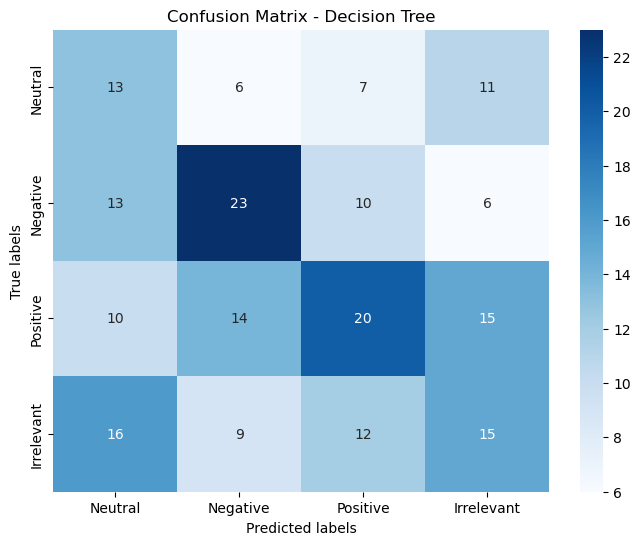

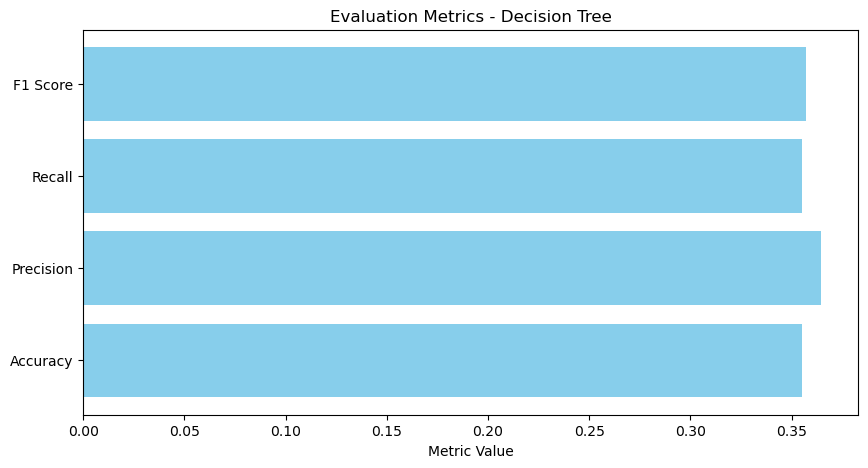


Evaluation for Random Forest:
Confusion Matrix:
[[ 8  8  8 13]
 [ 0 42  5  5]
 [ 1 23 23 12]
 [ 4 21  8 19]]
Accuracy: 46.0 percent
Precision: 0.49
Recall: 0.46
F1 Score: 0.44


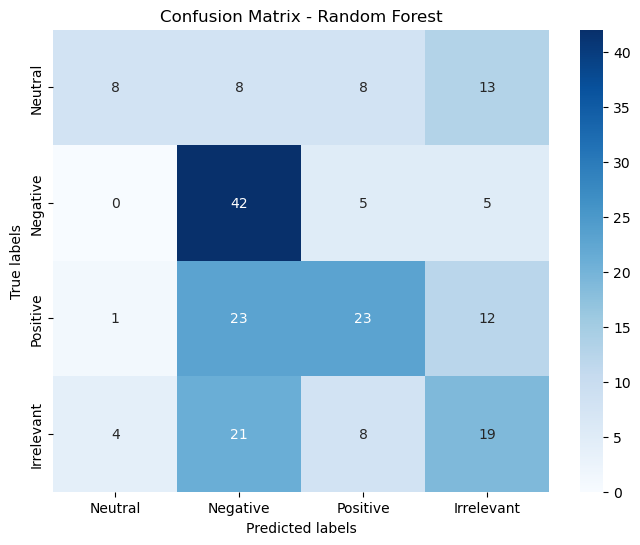

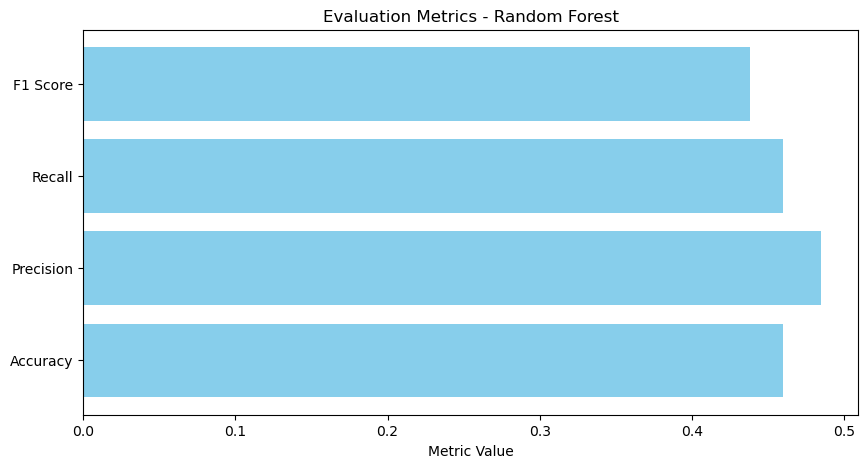


Evaluation for Logistic Regression:
Confusion Matrix:
[[ 5 10  5 17]
 [ 0 37  7  8]
 [ 2 12 32 13]
 [ 2 12  9 29]]
Accuracy: 51.5 percent
Precision: 0.53
Recall: 0.52
F1 Score: 0.49


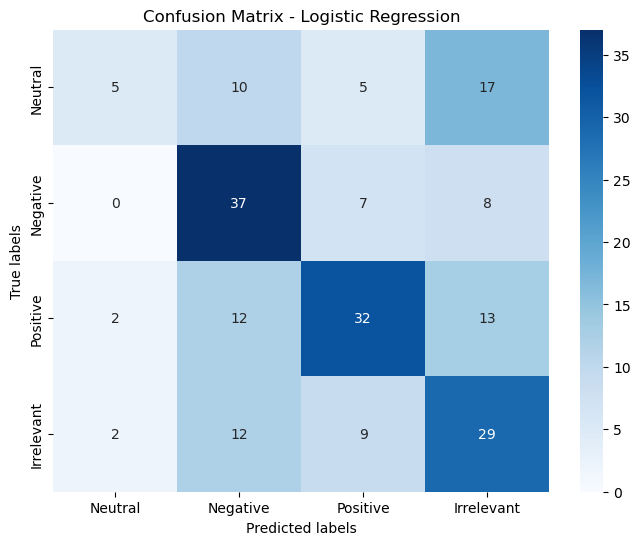

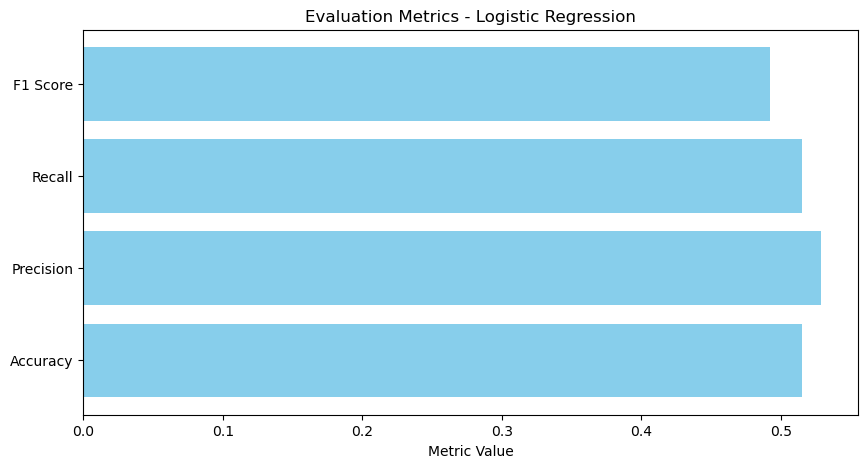


Evaluation for Linear SVM:
Confusion Matrix:
[[ 8  7  7 15]
 [ 1 38  5  8]
 [ 4 11 29 15]
 [ 7 10 11 24]]
Accuracy: 49.5 percent
Precision: 0.49
Recall: 0.5
F1 Score: 0.48


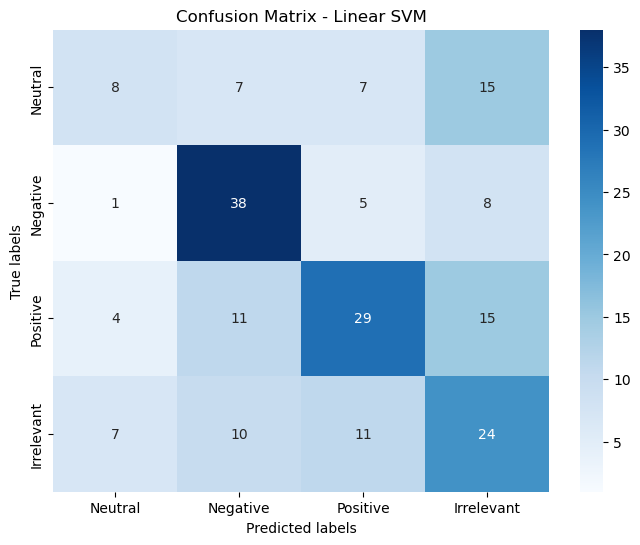

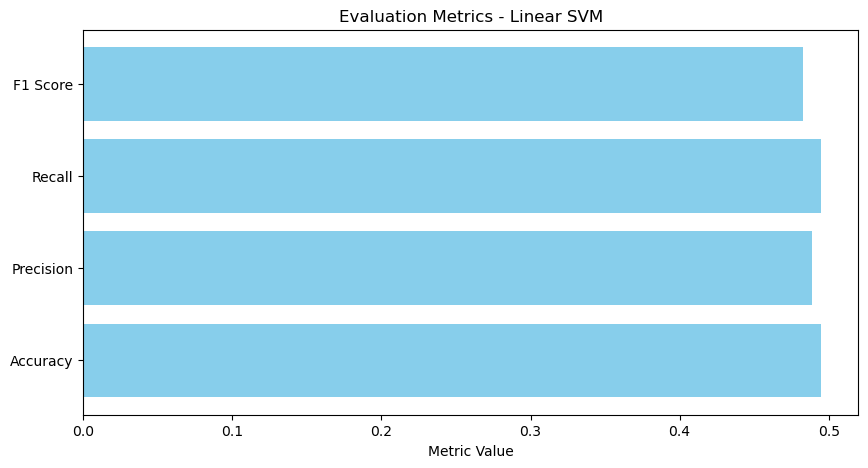


Evaluation for SVM:
Confusion Matrix:
[[ 3 11  7 16]
 [ 0 35  8  9]
 [ 0 12 33 14]
 [ 2 10 10 30]]
Accuracy: 50.5 percent
Precision: 0.53
Recall: 0.5
F1 Score: 0.47


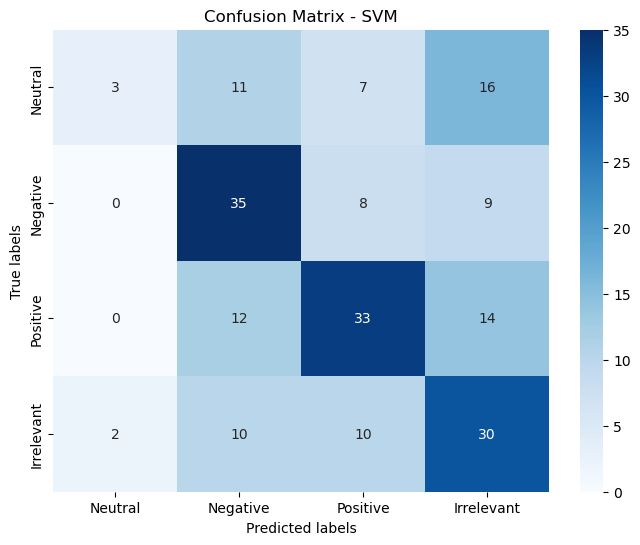

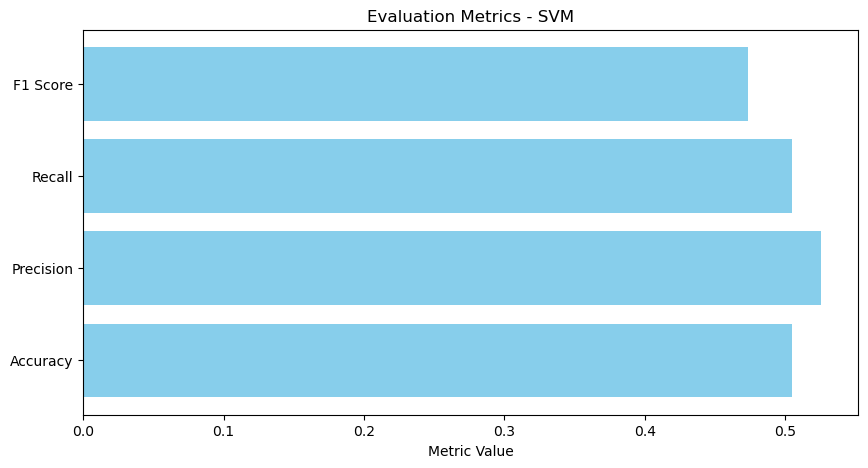


Evaluation for Naive Bayes:
Confusion Matrix:
[[ 3 11  3 20]
 [ 0 32 10 10]
 [ 0 10 35 14]
 [ 0  8 12 32]]
Accuracy: 51.0 percent
Precision: 0.6
Recall: 0.51
F1 Score: 0.48


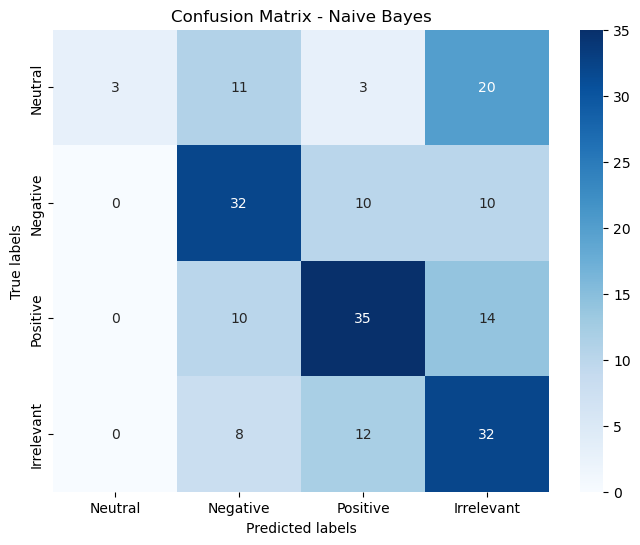

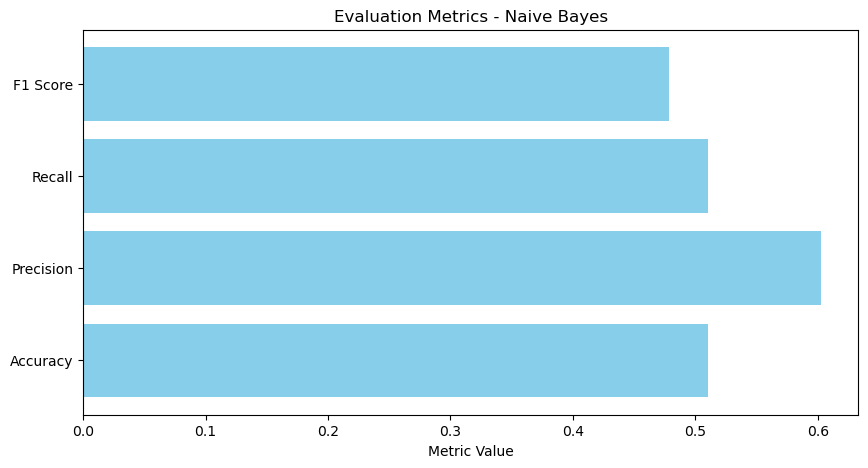


Evaluation for KNN:
Confusion Matrix:
[[10  9  8 10]
 [ 4 32  8  8]
 [ 8 19 23  9]
 [ 7 14 10 21]]
Accuracy: 43.0 percent
Precision: 0.43
Recall: 0.43
F1 Score: 0.42


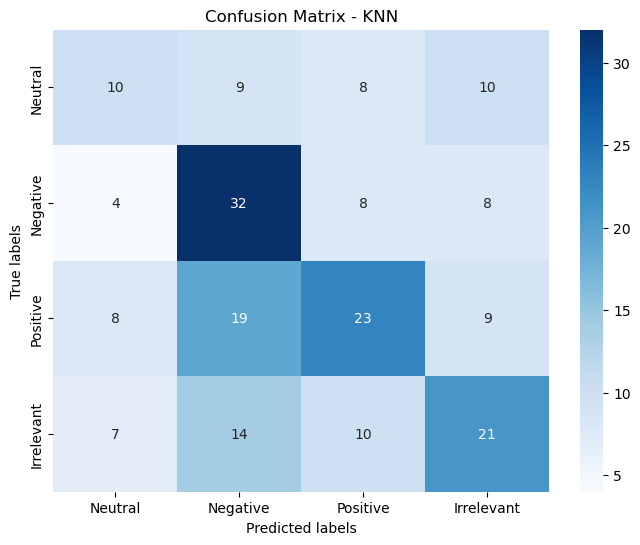

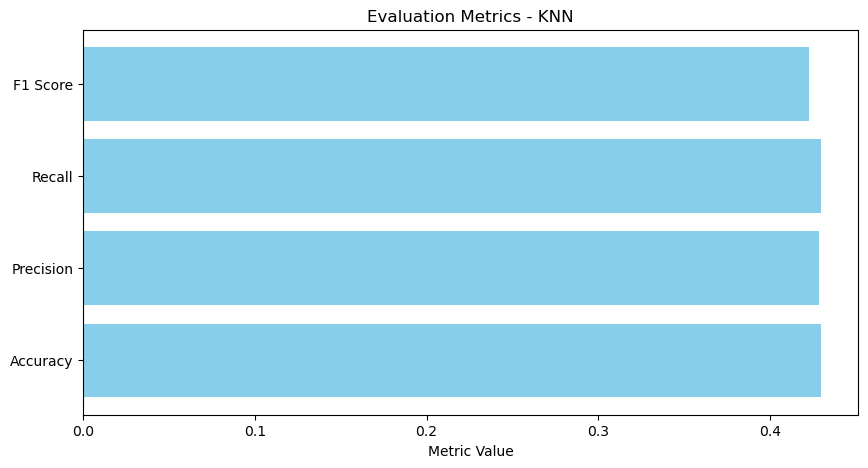

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have a DataFrame called df with 'clean_text' and 'sentiment' columns
X = validation_df['clean_text']
y = validation_df['sentiment']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Function to evaluate and plot results
def evaluate_and_plot_model(model, X_train_vec, y_train, X_val_vec, y_val, model_name):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_val_vec)

    # Calculate metrics
    cm = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    # Print metrics
    print(f"\nEvaluation for {model_name}:")
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", round(accuracy * 100, 2), "percent")
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1 Score:", round(f1, 2))

    # Get unique sentiment labels from the 'sentiment' column
    sentiment_labels = y_val.unique()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Plot horizontal bar chart for evaluation metrics
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    metrics_values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(10, 5))
    plt.barh(metrics_names, metrics_values, color='skyblue')
    plt.xlabel('Metric Value')
    plt.title(f'Evaluation Metrics - {model_name}')
    plt.show()

# Models
models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Linear SVM': SVC(kernel='linear', random_state=0),
    'SVM': SVC(kernel='rbf', random_state=0),
    'Naive Bayes' : MultinomialNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    # Add more models if needed
}

# Loop through models
for model_name, model in models.items():
    evaluate_and_plot_model(model, X_train_vec, y_train, X_val_vec, y_val, model_name)


In [18]:
import pandas as pd

# Misalkan Anda memiliki data akurasi seperti ini
acc_log_reg = 51.5
acc_svm = 50.5
acc_naive_bayes = 51.0
acc_knn = 43.0
acc_decision_tree = 35.5
acc_random_forest = 46.0
acc_linear_svm = 49.5

# Membuat DataFrame dengan model dan skor akurasi
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Decision Tree', 'Random Forest', 'Linear SVM'],
    'Score': [acc_log_reg, acc_svm, acc_knn, acc_decision_tree, acc_random_forest, acc_linear_svm]
})

# Mengurutkan DataFrame berdasarkan skor secara descending
models_sorted = models.sort_values(by='Score', ascending=False)

# Mengambil indeks pertama untuk setiap model (yang memiliki skor terbesar)
max_score_indices = models_sorted.groupby('Model').head().index

# Mengambil baris dengan indeks yang telah diidentifikasi
best_models = models.loc[max_score_indices]

# Menampilkan hasil
print(best_models)


                     Model  Score
0      Logistic Regression   51.5
1  Support Vector Machines   50.5
5               Linear SVM   49.5
4            Random Forest   46.0
2                      KNN   43.0
3            Decision Tree   35.5


In [19]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create individual classifiers
linear_svc_classifier = SVC(kernel='linear', random_state=0)
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
svm_classifier = SVC(kernel='rbf', random_state=0)

# Create a VotingClassifier
voting_classifier = VotingClassifier(estimators=[
    ('lr', logistic_classifier),
    ('lv', linear_svc_classifier),
    ('svm', svm_classifier)
], voting='hard')

# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train_vec, y_train)

# Make predictions using the VotingClassifier
y_pred_voting = voting_classifier.predict(X_val_vec)

# Evaluate the VotingClassifier's accuracy
acc_voting = round(accuracy_score(y_val, y_pred_voting) * 100, 2)
print("Voting Classifier Accuracy: " + str(acc_voting) + " percent")


Voting Classifier Accuracy: 51.5 percent


In [20]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import VotingClassifier

# Split dataset sampel menjadi data latih dan data uji
X = validation_df['clean_text']
y = validation_df['sentiment']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Create individual classifiers

svm_classifier = SVC(kernel = 'rbf', random_state = 0)
random_forest_classifier = RandomForestClassifier(random_state=42)
linear_svm_classifier = SVC(kernel = 'linear', random_state = 0)

# Create a VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('lr', linear_svm_classifier), ('rf', random_forest_classifier), ('svc', svm_classifier)],
    voting='hard'
)

# Loop through classifiers
classifiers = [linear_svm_classifier, random_forest_classifier, svm_classifier, voting_classifier]

for clf, label in zip(classifiers, ['Linear SVM', 'Random Forest', 'SVM', 'Ensemble']):
    scores = cross_val_score(clf, X_train_vec, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.51 (+/- 0.03) [Linear SVM]
Accuracy: 0.49 (+/- 0.03) [Random Forest]
Accuracy: 0.50 (+/- 0.04) [SVM]
Accuracy: 0.51 (+/- 0.03) [Ensemble]
